In [1]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [1]:
import keras
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import train_test_split
from keras.layers import Input, Reshape, Activation, add, Add
from keras.layers import  BatchNormalization,Dense, Conv2D, Convolution2D, MaxPooling2D, Dropout, Flatten, TimeDistributed, InputLayer, LSTM
from keras.models import Sequential, Model 
from keras import optimizers

from keras import backend as K
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 

%matplotlib inline

Using TensorFlow backend.


In [2]:
def recall(y_target, y_pred):
    y_target_yn = K.round(K.clip(y_target, 0, 1))
    y_pred_yn = K.round(K.clip(y_pred, 0, 1))
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 
    count_true_positive_false_negative = K.sum(y_target_yn)
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())
    return recall


def precision(y_target, y_pred):
    y_pred_yn = K.round(K.clip(y_pred, 0, 1))
    y_target_yn = K.round(K.clip(y_target, 0, 1))
    count_true_positive = K.sum(y_target_yn * y_pred_yn)
    count_true_positive_false_positive = K.sum(y_pred_yn)
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    return _f1score

In [3]:
def drawGraph(hist, X_test, y_test) :
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()
    return

def drawGraph2(hist, X_test, y_test) :
    fig, rec_ax = plt.subplots()

    pre_ax = rec_ax.twinx()

    rec_ax.plot(hist.history['recall'], 'y', label='train recall')
    rec_ax.plot(hist.history['val_recall'], 'r', label='val recall')

    pre_ax.plot(hist.history['precision'], 'b', label='train precision')
    pre_ax.plot(hist.history['val_precision'], 'g', label='val precision')

    rec_ax.set_xlabel('epoch')
    rec_ax.set_ylabel('recall')
    pre_ax.set_ylabel('precision')

    rec_ax.legend(loc='upper left')
    pre_ax.legend(loc='lower left')
    
    _loss, _acc, _precision, _recall, _f1score = model.evaluate(X_test, y_test)
    print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

    plt.show()
    return

In [4]:
f=pd.read_csv('Features/Normalizedfeatures.csv')
f.dropna(axis=0)
f

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Activity,Mobility,Complexity,Kurtosis,2nd Difference Mean,2nd Difference Max,Coeffiecient of Variation,Skewness,1st Difference Mean,1st Difference Max,...,Wavelet Detailed Energy,Wavelet Approximate Entropy,Wavelet Detailed Entropy,Variance,Mean of Vertex to Vertex Slope,FFT Delta MaxPower,FFT Theta MaxPower,FFT Alpha MaxPower,FFT Beta MaxPower,Autro Regressive Mode Order 3 Coefficients for each channel ->
-0.077453,1.429129,-0.940669,-0.164103,0.067128,-0.014628,-0.076057,-0.324064,0.293069,-0.048592,-0.173241,-0.217290,-0.108004,0.055348,-0.070709,-0.054240,-0.077042,-0.054205,0.442814,-0.054192,-0.088001,-0.062304,-0.055763,-0.235621,1.113269,-0.856030,-1.026205,1.712305,-1.449363,-2.064397,1.768678,-1.666914,-1.744099,1.734875,-1.456976,-2.023619,1.521028,-0.977781,-1.888093,1.723047,-1.453480,-1.736987,1.091787,-0.821553,-1.283064,1.334691,-1.385398,-0.206410,1.451434,-1.250430,-1.471480,1.714426,...,1.627450,-1.264527,-1.779981,1.699242,-1.436682,-2.040696,1.043623,-0.748704,-1.033575,Training-Data/Low
-0.077375,1.391269,-0.920764,-0.169548,0.054271,-0.019115,-0.072830,-0.169495,0.294554,-0.044372,-0.335670,-0.213534,-0.070211,0.055568,-0.164093,-0.054238,-0.173782,-0.054205,0.389954,-0.054085,-0.081434,-0.059947,-0.055106,-0.235767,1.107057,-0.851678,-1.019746,1.706706,-1.459076,-2.004368,1.763532,-1.670125,-1.709221,1.723964,-1.458070,-1.978004,1.497492,-0.981900,-1.812069,1.728313,-1.458060,-1.741860,1.104715,-0.824156,-1.317840,1.565489,-1.392827,-1.403700,1.528200,-1.256094,-1.778224,1.745033,...,1.626777,-1.267875,-1.769175,1.697429,-1.445134,-1.997967,1.009918,-0.745210,-0.972378,Training-Data/Low
-0.077974,1.567450,-1.003189,-0.194215,0.063165,-0.019006,-0.085896,-0.290592,0.312449,-0.049269,-0.283665,-0.262008,-0.098985,0.062332,-0.134806,-0.053933,-0.143512,-0.054069,0.405200,-0.053851,-0.089069,-0.062115,-0.059208,-0.236371,1.177844,-0.858590,-1.167120,1.747286,-1.454435,-2.197029,1.830368,-1.670379,-2.007083,1.763947,-1.455349,-2.141034,1.521365,-0.976878,-1.891233,1.850039,-1.459543,-2.184868,1.258512,-0.829424,-1.802242,1.585381,-1.397684,-1.485791,1.575635,-1.256676,-1.978817,1.777172,...,1.674934,-1.270135,-1.913297,1.738964,-1.443400,-2.197498,1.063218,-0.756163,-1.061853,Training-Data/Low
-0.074313,1.230136,-0.761276,-0.036340,0.099599,-0.006364,-0.031667,0.151076,0.302699,-0.040192,-0.148730,-0.125763,-0.074567,0.062082,-0.056399,-0.053952,-0.062191,-0.054078,0.423172,-0.053862,-0.078475,-0.061160,-0.053345,-0.236140,1.098784,-0.828981,-1.040362,1.692696,-1.430251,-2.050035,1.758608,-1.638732,-1.803294,1.704497,-1.431052,-1.989516,0.889697,-0.909304,-0.284104,1.675212,-1.426471,-1.646548,0.993759,-0.789879,-1.052174,1.431815,-1.363541,-0.835280,1.481030,-1.227928,-1.683199,1.724811,...,1.609584,-1.238564,-1.791879,1.696663,-1.423305,-2.083078,1.019715,-0.718627,-1.027284,Training-Data/Low
-0.069348,0.909250,-0.509238,-0.084306,0.117016,-0.008060,0.026882,-0.174556,0.298962,-0.032986,-0.433741,0.011360,-0.073603,0.058058,-0.218214,-0.054127,-0.229592,-0.054154,0.420062,-0.053893,-0.062367,-0.042974,-0.044536,-0.235332,0.898814,-0.820851,-0.604336,1.620754,-1.429660,-1.740991,1.594439,-1.644551,-1.047832,1.641015,-1.427201,-1.756868,0.181585,-0.877321,1.624017,1.610865,-1.434270,-1.385193,0.857562,-0.793509,-0.600393,1.453055,-1.369848,-0.917328,1.483778,-1.234505,-1.670046,1.685872,...,1.433532,-1.240065,-1.239598,1.573595,-1.420200,-1.525344,0.775007,-0.710419,-0.559892,Training-Data/Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.083690,-0.792512,0.867553,0.330013,-0.563489,-0.082980,-0.253129,1.254635,-0.637100,-0.107550,-0.360118,-0.268385,-0.049723,-0.254417,-0.178709,-0.062231,-0.188986,-0.057442,0.431159,-0.068744,-0.087793,-0.054371,-0.061291,-0.2

In [5]:
f=f.values
X=f[: , :-1]
y=f[: , -1]
print(pd.DataFrame(X))

           0         1         2         3         4         5         6   \
0     1.09179 -0.821553  -1.28306   1.33469   -1.3854  -0.20641   1.45143   
1     1.10471 -0.824156  -1.31784   1.56549  -1.39283   -1.4037    1.5282   
2     1.25851 -0.829424  -1.80224   1.58538  -1.39768  -1.48579   1.57564   
3    0.993759 -0.789879  -1.05217   1.43181  -1.36354  -0.83528   1.48103   
4    0.857562 -0.793509 -0.600393   1.45305  -1.36985 -0.917328   1.48378   
..        ...       ...       ...       ...       ...       ...       ...   
355  0.414559 -0.558218  0.189589 -0.329373  0.490715 -0.695407 -0.631961   
356  0.642498 -0.619158 -0.382224 -0.364611  0.528771 -0.697392 -0.739298   
357  0.513535 -0.567886 -0.104877 -0.166447  0.280845  -0.51651 -0.647064   
358  0.527884 -0.532561 -0.248551 -0.273889  0.572424  -1.40109 -0.667123   
359  0.388696 -0.499242  0.111321 -0.324679  0.601583  -1.27537 -0.595632   

           7            8         9   ...        14           15        16 

In [6]:
y=pd.DataFrame(y)
y=y.replace('Training-Data/Low', 0)
y=y.replace('Training-Data/High', 1)
y=y.values

y=to_categorical(y)
print(y.shape)

(360, 2)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, shuffle=True, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(252, 24) (108, 24) (252, 2) (108, 2)


In [8]:
def model_create(eeg_data):
    eeg_input=Input(shape=(24,)) #입력 정의
    
    eeg_output = Dense(50, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(150, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(150, activation='relu')(eeg_input)
    eeg_output = Dropout(0.5)(eeg_output)
    eeg_output = Dense(200, activation='relu')(eeg_output)
    
    model = Dense(2, activation='sigmoid')(eeg_output)
    
    model = keras.models.Model(inputs=eeg_input, outputs=model) 
    
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy', precision, recall, f1score])
    
    return model 

model=model_create(X)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               3750      
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               30200     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 402       
Total params: 34,352
Trainable params: 34,352
Non-trainable params: 0
_________________________________________________________________


In [9]:
hist=model.fit(X_train, y_train, epochs=30, batch_size=10, validation_data=(X_test,y_test))

Train on 252 samples, validate on 108 samples
Epoch 1/30
252/252 [==============================] - 1s 2ms/step - loss: 0.4803 - accuracy: 0.8452 - precision: 0.8722 - recall: 0.7885 - f1score: 0.8126 - val_loss: 0.2345 - val_accuracy: 0.9815 - val_precision: 0.9795 - val_recall: 0.9795 - val_f1score: 0.9795
Epoch 2/30
252/252 [==============================] - 0s 416us/step - loss: 0.1764 - accuracy: 0.9841 - precision: 0.9815 - recall: 0.9885 - f1score: 0.9848 - val_loss: 0.0820 - val_accuracy: 0.9815 - val_precision: 0.9795 - val_recall: 0.9795 - val_f1score: 0.9795
Epoch 3/30
252/252 [==============================] - 0s 408us/step - loss: 0.0825 - accuracy: 0.9921 - precision: 0.9923 - recall: 0.9923 - f1score: 0.9923 - val_loss: 0.0764 - val_accuracy: 0.9815 - val_precision: 0.9795 - val_recall: 0.9795 - val_f1score: 0.9795
Epoch 4/30
252/252 [==============================] - 0s 443us/step - loss: 0.0865 - accuracy: 0.9921 - precision: 0.9923 - recall: 0.9923 - f1score: 0.9923 -

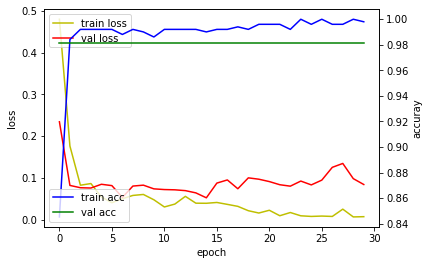

In [10]:
drawGraph(hist, X_test, y_test)

108/108 [==============================] - 0s 92us/step
loss: 0.084, accuracy: 0.981, precision: 0.971, recall: 0.971, f1score: 0.971


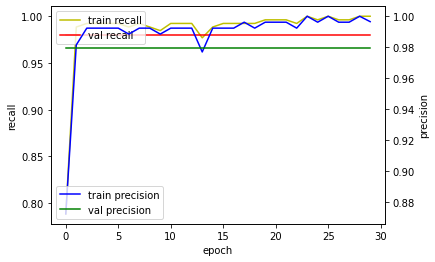

In [11]:
drawGraph2(hist, X_test, y_test)

In [16]:
#X_train = X_train.reshape(X_train.shape+ (1,))
#X_test = X_test.reshape(X_test.shape + (1,))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

def lstm_model():
    model = Sequential()
    model.add(LSTM(50, input_shape = (24,1), return_sequences = True))
    model.add(LSTM(2, return_sequences = False))
    model.add(Activation('sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy', precision, recall, f1score])
    return model

model = lstm_model()

model.summary()

(252, 24, 1) (108, 24, 1) (252, 2) (108, 2)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 24, 50)            10400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 2)                 424       
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 10,824
Trainable params: 10,824
Non-trainable params: 0
_________________________________________________________________


In [20]:
hist=model.fit(X_train, y_train, epochs=40, batch_size=8, validation_data=(X_test,y_test))

Train on 252 samples, validate on 108 samples
Epoch 1/40
252/252 [==============================] - 1s 4ms/step - loss: 0.3393 - accuracy: 0.9742 - precision: 0.9731 - recall: 0.9766 - f1score: 0.9747 - val_loss: 0.3584 - val_accuracy: 0.9537 - val_precision: 0.9504 - val_recall: 0.9643 - val_f1score: 0.9564
Epoch 2/40
252/252 [==============================] - 1s 4ms/step - loss: 0.3387 - accuracy: 0.9742 - precision: 0.9731 - recall: 0.9766 - f1score: 0.9747 - val_loss: 0.3555 - val_accuracy: 0.9583 - val_precision: 0.9504 - val_recall: 0.9732 - val_f1score: 0.9611
Epoch 3/40
252/252 [==============================] - 1s 4ms/step - loss: 0.3314 - accuracy: 0.9821 - precision: 0.9774 - recall: 0.9805 - f1score: 0.9789 - val_loss: 0.3636 - val_accuracy: 0.9444 - val_precision: 0.9464 - val_recall: 0.9464 - val_f1score: 0.9464
Epoch 4/40
252/252 [==============================] - 1s 4ms/step - loss: 0.3270 - accuracy: 0.9881 - precision: 0.9883 - recall: 0.9883 - f1score: 0.9883 - val_l

Epoch 32/40
252/252 [==============================] - 1s 4ms/step - loss: 0.3174 - accuracy: 0.9960 - precision: 0.9961 - recall: 0.9961 - f1score: 0.9961 - val_loss: 0.3319 - val_accuracy: 0.9815 - val_precision: 0.9821 - val_recall: 0.9821 - val_f1score: 0.9821
Epoch 33/40
252/252 [==============================] - 1s 4ms/step - loss: 0.3174 - accuracy: 0.9960 - precision: 0.9961 - recall: 0.9961 - f1score: 0.9961 - val_loss: 0.3319 - val_accuracy: 0.9815 - val_precision: 0.9821 - val_recall: 0.9821 - val_f1score: 0.9821
Epoch 34/40
252/252 [==============================] - 1s 4ms/step - loss: 0.3174 - accuracy: 0.9960 - precision: 0.9961 - recall: 0.9961 - f1score: 0.9961 - val_loss: 0.3319 - val_accuracy: 0.9815 - val_precision: 0.9821 - val_recall: 0.9821 - val_f1score: 0.9821
Epoch 35/40
252/252 [==============================] - 1s 4ms/step - loss: 0.3174 - accuracy: 0.9960 - precision: 0.9961 - recall: 0.9961 - f1score: 0.9961 - val_loss: 0.3319 - val_accuracy: 0.9815 - val_p

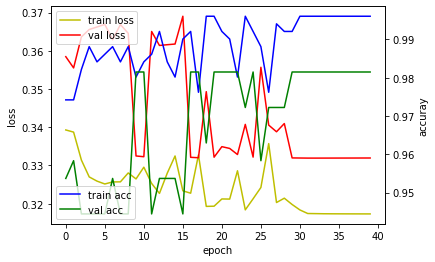

In [21]:
drawGraph(hist, X_test, y_test)

108/108 [==============================] - 0s 323us/step
loss: 0.332, accuracy: 0.981, precision: 0.971, recall: 0.971, f1score: 0.971


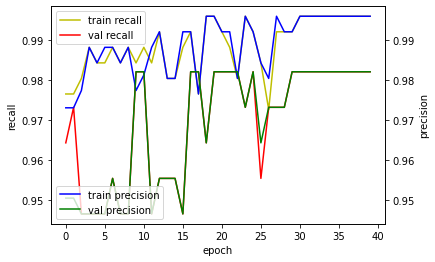

In [22]:
drawGraph2(hist, X_test, y_test)

In [25]:
X_train=X_train.reshape(-1,6,4)
X_test=X_test.reshape(-1,6,4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(252, 6, 4) (108, 6, 4) (252, 2) (108, 2)


In [29]:
X_train = X_train.reshape(X_train.shape+ (1,))
X_test = X_test.reshape(X_test.shape + (1,))

In [30]:
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters = 50, kernel_size = (2,2), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    
    
    # final layer with 10 neurons to classify the instances
    model.add(Dense(50, activation = 'relu'))
    
    # final layer with 10 neurons to classify the instances
    model.add(Dense(2, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics=['accuracy', precision, recall, f1score])
    return model

model = basic_cnn()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 4, 50)          250       
_________________________________________________________________
activation_4 (Activation)    (None, 6, 4, 50)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 2, 50)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 2, 50)          10050     
_________________________________________________________________
activation_5 (Activation)    (None, 3, 2, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

In [31]:
hist=model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test,y_test))

Train on 252 samples, validate on 108 samples
Epoch 1/20
252/252 [==============================] - 2s 10ms/step - loss: 0.4228 - accuracy: 0.8651 - precision: 0.8633 - recall: 0.8633 - f1score: 0.8633 - val_loss: 0.1524 - val_accuracy: 0.9815 - val_precision: 0.9821 - val_recall: 0.9821 - val_f1score: 0.9821
Epoch 2/20
252/252 [==============================] - 0s 637us/step - loss: 0.1017 - accuracy: 0.9921 - precision: 0.9922 - recall: 0.9922 - f1score: 0.9922 - val_loss: 0.0314 - val_accuracy: 0.9907 - val_precision: 0.9911 - val_recall: 0.9911 - val_f1score: 0.9911
Epoch 3/20
252/252 [==============================] - 0s 653us/step - loss: 0.0582 - accuracy: 0.9921 - precision: 0.9922 - recall: 0.9922 - f1score: 0.9922 - val_loss: 0.0856 - val_accuracy: 0.9815 - val_precision: 0.9821 - val_recall: 0.9821 - val_f1score: 0.9821
Epoch 4/20
252/252 [==============================] - 0s 649us/step - loss: 0.0508 - accuracy: 0.9921 - precision: 0.9922 - recall: 0.9922 - f1score: 0.9922 

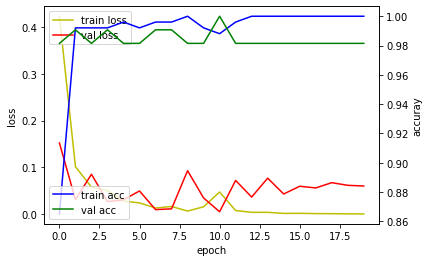

In [32]:
drawGraph(hist, X_test, y_test)

108/108 [==============================] - 0s 961us/step
loss: 0.060, accuracy: 0.981, precision: 0.971, recall: 0.971, f1score: 0.971


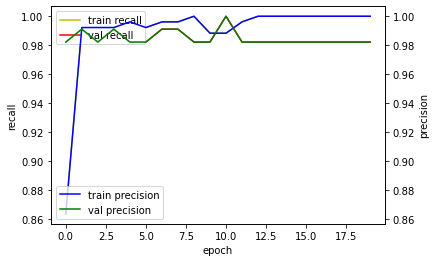

In [33]:
drawGraph2(hist, X_test, y_test)